In [45]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [46]:
df = pd.read_csv('dulieuxettuyendaihoc.csv',
                 header=0,delimiter=','
                 ,encoding='utf-8')
df = df[['GT','DT','KV','KT','M1',
         'M2','M3',
         'NGAYTHI','DINHHUONGNGHENGHIEP']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
GT                     100 non-null object
DT                     3 non-null float64
KV                     100 non-null object
KT                     100 non-null object
M1                     100 non-null float64
M2                     100 non-null float64
M3                     100 non-null float64
NGAYTHI                100 non-null object
DINHHUONGNGHENGHIEP    100 non-null object
dtypes: float64(4), object(5)
memory usage: 7.1+ KB


In [47]:
df.head(5)


,GT,DT,KV,KT,M1,M2,M3,NGAYTHI,DINHHUONGNGHENGHIEP
0,F,NaN,2NT,A1,3.25,3.25,4.50,12/7/2018,No
1,M,NaN,1,C,6.00,4.00,3.50,12/7/2018,Yes
2,M,NaN,1,C,5.00,6.75,4.00,12/7/2018,No
3,M,NaN,1,D1,4.25,4.25,5.25,12/7/2018,No
4,M,NaN,2NT,A,4.25,4.50,5.00,12/7/2018,No


In [48]:
df.dropna(how='all', inplace=True)


In [49]:
df.drop_duplicates(inplace=True)

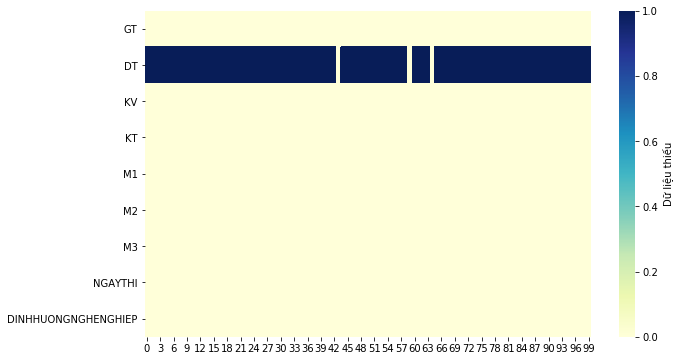

In [50]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),cmap='YlGnBu',
            cbar_kws={'label':'Dữ liệu thiếu'})
plt.savefig('missingdata.png', dpi=100)
plt.show()

In [51]:
df['DT'].fillna('KINH', inplace=True)
df['M1'].fillna(df['M1'].mean(), inplace=True)
df['M2'].fillna(df['M2'].median(), inplace=True)
df['M3'].fillna(0, inplace=True)

- Sinh viên tự làm tạo cột MaxM = giá trị lớn nhất của (M1,M2,M3)

In [52]:
df['TBM'] = (df['M1'] +df['M2'] +df['M3'])/3
df

,GT,DT,KV,KT,M1,M2,M3,NGAYTHI,DINHHUONGNGHENGHIEP,TBM
0,F,KINH,2NT,A1,3.25,3.25,4.50,12/7/2018,No,3.666667
1,M,KINH,1,C,6.00,4.00,3.50,12/7/2018,Yes,4.500000
2,M,KINH,1,C,5.00,6.75,4.00,12/7/2018,No,5.250000
3,M,KINH,1,D1,4.25,4.25,5.25,12/7/2018,No,4.583333
4,M,KINH,2NT,A,4.25,4.50,5.00,12/7/2018,No,4.583333
5,M,KINH,1,D1,1.50,4.00,6.00,12/7/2018,No,3.833333
6,F,KINH,2,C,6.50,6.75,5.25,12/7/2018,Yes,6.166667
7,F,KINH,2,D1,3.75,4.50,4.25,12/7/2018,Yes,4.166667
8,F,KINH,1,D1,3.50,3.50,6.75,12/7/2018,Yes,4.583333
9,F,KINH,1,D1,4.00,4.75,5.50,12/7/2018,Yes,4.750000


In [53]:
# Tạo biến xếp loại: đánh giá môn toán trên df['TBM']
df.loc[df['TBM'] < 5.0, 'XL'] = 'FAIL'

df.loc[(df['TBM'] >= 5.0) & 
       (df['TBM'] < 7.0), 'XL'] = 'FAIR'

df.loc[(df['TBM'] >= 7.0) & 
       (df['TBM'] < 9.0), 'XL'] = 'GOOD'

df.loc[df['TBM'] >= 9.0, 'XL'] = 'EXCEL'
df

,GT,DT,KV,KT,M1,M2,M3,NGAYTHI,DINHHUONGNGHENGHIEP,TBM,XL
0,F,KINH,2NT,A1,3.25,3.25,4.50,12/7/2018,No,3.666667,FAIL
1,M,KINH,1,C,6.00,4.00,3.50,12/7/2018,Yes,4.500000,FAIL
2,M,KINH,1,C,5.00,6.75,4.00,12/7/2018,No,5.250000,FAIR
3,M,KINH,1,D1,4.25,4.25,5.25,12/7/2018,No,4.583333,FAIL
4,M,KINH,2NT,A,4.25,4.50,5.00,12/7/2018,No,4.583333,FAIL
5,M,KINH,1,D1,1.50,4.00,6.00,12/7/2018,No,3.833333,FAIL
6,F,KINH,2,C,6.50,6.75,5.25,12/7/2018,Yes,6.166667,FAIR
7,F,KINH,2,D1,3.75,4.50,4.25,12/7/2018,Yes,4.166667,FAIL
8,F,KINH,1,D1,3.50,3.50,6.75,12/7/2018,Yes,4.583333,FAIL
9,F,KINH,1,D1,4.00,4.75,5.50,12/7/2018,Yes,4.750000,FAIL


In [54]:
 # Tạo biến nhóm, tinh theo khối thi KT
# Cấu trúc distonary : {key: value}    
dict_map = {
    'A1':'G1', 'C':'G3', 'D1': 'G3', 'A': 'G1', 'B': 'G2'
}
df['NHOM'] = df['KT'].map(dict_map)
df

,GT,DT,KV,KT,M1,M2,M3,NGAYTHI,DINHHUONGNGHENGHIEP,TBM,XL,NHOM
0,F,KINH,2NT,A1,3.25,3.25,4.50,12/7/2018,No,3.666667,FAIL,G1
1,M,KINH,1,C,6.00,4.00,3.50,12/7/2018,Yes,4.500000,FAIL,G3
2,M,KINH,1,C,5.00,6.75,4.00,12/7/2018,No,5.250000,FAIR,G3
3,M,KINH,1,D1,4.25,4.25,5.25,12/7/2018,No,4.583333,FAIL,G3
4,M,KINH,2NT,A,4.25,4.50,5.00,12/7/2018,No,4.583333,FAIL,G1
5,M,KINH,1,D1,1.50,4.00,6.00,12/7/2018,No,3.833333,FAIL,G3
6,F,KINH,2,C,6.50,6.75,5.25,12/7/2018,Yes,6.166667,FAIR,G3
7,F,KINH,2,D1,3.75,4.50,4.25,12/7/2018,Yes,4.166667,FAIL,G3
8,F,KINH,1,D1,3.50,3.50,6.75,12/7/2018,Yes,4.583333,FAIL,G3
9,F,KINH,1,D1,4.00,4.75,5.50,12/7/2018,Yes,4.750000,FAIL,G3


In [55]:

def fplus(x,y):
    if (x == 'G1' or x == 'G2') and (y >= 4.0):
        return 1.0
    else:
        return 0.0

df['PLUS'] = list(map(fplus,df['NHOM'],df['TBM']))
df

,GT,DT,KV,KT,M1,M2,M3,NGAYTHI,DINHHUONGNGHENGHIEP,TBM,XL,NHOM,PLUS
0,F,KINH,2NT,A1,3.25,3.25,4.50,12/7/2018,No,3.666667,FAIL,G1,0.0
1,M,KINH,1,C,6.00,4.00,3.50,12/7/2018,Yes,4.500000,FAIL,G3,0.0
2,M,KINH,1,C,5.00,6.75,4.00,12/7/2018,No,5.250000,FAIR,G3,0.0
3,M,KINH,1,D1,4.25,4.25,5.25,12/7/2018,No,4.583333,FAIL,G3,0.0
4,M,KINH,2NT,A,4.25,4.50,5.00,12/7/2018,No,4.583333,FAIL,G1,1.0
5,M,KINH,1,D1,1.50,4.00,6.00,12/7/2018,No,3.833333,FAIL,G3,0.0
6,F,KINH,2,C,6.50,6.75,5.25,12/7/2018,Yes,6.166667,FAIR,G3,0.0
7,F,KINH,2,D1,3.75,4.50,4.25,12/7/2018,Yes,4.166667,FAIL,G3,0.0
8,F,KINH,1,D1,3.50,3.50,6.75,12/7/2018,Yes,4.583333,FAIL,G3,0.0
9,F,KINH,1,D1,4.00,4.75,5.50,12/7/2018,Yes,4.750000,FAIL,G3,0.0


- Sinh viên tự làm tạo cột MaxM = giá trị lớn nhất của (M1,M2,M3)

In [56]:
# Sinh viên tự làm tạo cột MaxM = giá trị lớn nhất của (M1,M2,M3)
df['MaxM'] = df[['M1','M2','M3']].max(axis=1)
df

,GT,DT,KV,KT,M1,M2,M3,NGAYTHI,DINHHUONGNGHENGHIEP,TBM,XL,NHOM,PLUS,MaxM
0,F,KINH,2NT,A1,3.25,3.25,4.50,12/7/2018,No,3.666667,FAIL,G1,0.0,4.50
1,M,KINH,1,C,6.00,4.00,3.50,12/7/2018,Yes,4.500000,FAIL,G3,0.0,6.00
2,M,KINH,1,C,5.00,6.75,4.00,12/7/2018,No,5.250000,FAIR,G3,0.0,6.75
3,M,KINH,1,D1,4.25,4.25,5.25,12/7/2018,No,4.583333,FAIL,G3,0.0,5.25
4,M,KINH,2NT,A,4.25,4.50,5.00,12/7/2018,No,4.583333,FAIL,G1,1.0,5.00
5,M,KINH,1,D1,1.50,4.00,6.00,12/7/2018,No,3.833333,FAIL,G3,0.0,6.00
6,F,KINH,2,C,6.50,6.75,5.25,12/7/2018,Yes,6.166667,FAIR,G3,0.0,6.75
7,F,KINH,2,D1,3.75,4.50,4.25,12/7/2018,Yes,4.166667,FAIL,G3,0.0,4.50
8,F,KINH,1,D1,3.50,3.50,6.75,12/7/2018,Yes,4.583333,FAIL,G3,0.0,6.75
9,F,KINH,1,D1,4.00,4.75,5.50,12/7/2018,Yes,4.750000,FAIL,G3,0.0,5.50


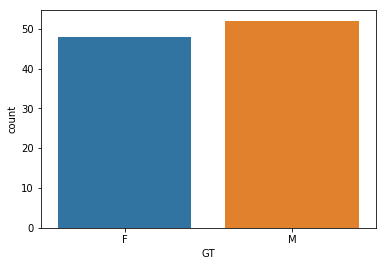

In [57]:
 # hãy trực quan sô lượng học ính thoe giới tính
sns.countplot(x='GT', data=df)
plt.show()

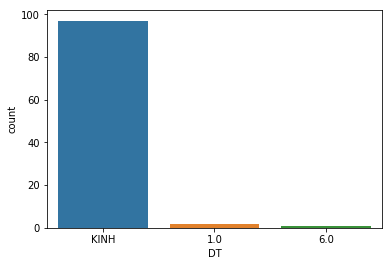

In [58]:
# Sinh viên tự làm tương tự cho các cột DT
# --> Dựa trên biểu đồ DT cho biết tại sao 
#     ta không phân tích theo phân nhóm DT
sns.countplot(x = 'DT',data=df)
plt.show()

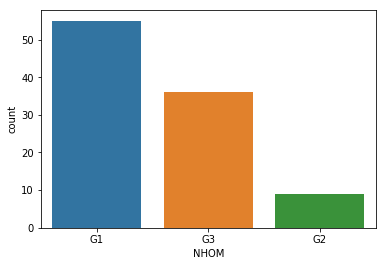

In [59]:
# Sinh viên tự làm tương tự cho các cột NHOM
# --> Dựa trên biểu đồ NHOM 
#     hãy cho biết nhóm nào có lượng thí sinh đông nhất 
#     và thấp nhất
sns.countplot(x = 'NHOM',data=df)
plt.show()
# -> nhóm G1 có lượng thí sinh đông nhất và nhóm G3 có lượng thí sinh thấp nhất

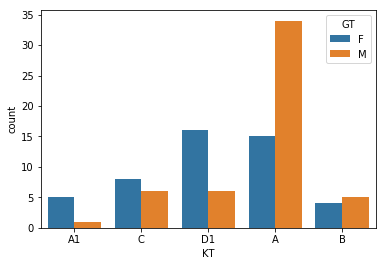

In [60]:
# Khối thi dựa vào giới tính
#Cột cao nhất là khối A
sns.countplot(x='KT', hue='GT',data=df)
plt.show()

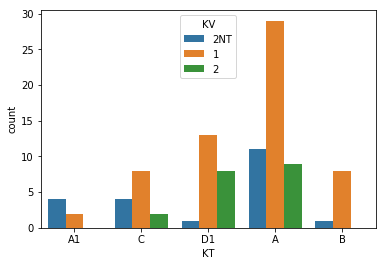

In [61]:
'''
Sinh viên tự làm tương tự cho các nhóm 
biến định tính: (KV,KT)
-->Hãy cho biết khối A có sinh viên khu vực nào đăng ký nhiều nhất
'''
sns.countplot(x='KT', hue='KV',data=df)
plt.show()
# -> khu vực 1 đăng ký nhiều nhất

d:\USERS\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


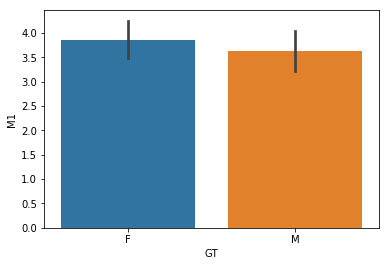

In [62]:
# Hãy so sánh diểm trung bình M1 theo nhóm giới tính

sns.barplot(x='GT', y='M1', data=df )
plt.show()

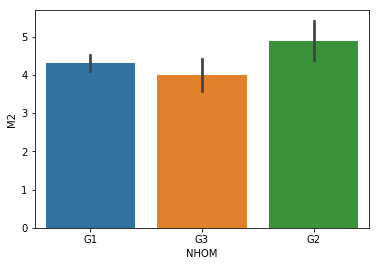

In [63]:
'''
Hãy so sánh trung bình điểm M2 theo NHOM
-> Cho biết nhóm thi nào có điểm thi M2 cao nhất
'''

sns.barplot(x= 'NHOM', y = 'M2' , data= df)
plt.show()
# -> nhóm G2 có điểm thi M2 cao nhất


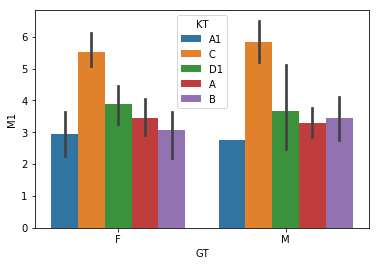

In [64]:
sns.barplot(x='GT', y='M1', hue='KT', data=df)
plt.show()

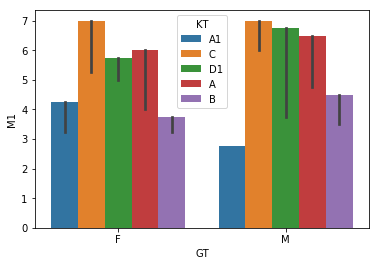

In [65]:
# So sánh diểm cao nhất của điiểm M1 theo nhóm KT và GT 
sns.barplot(x='GT', y='M1', hue='KT', data=df, 
           estimator=max)
plt.show()

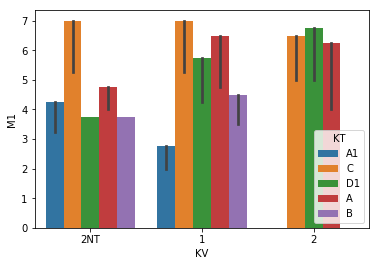

In [66]:
# Có nhiều hơn 2 giá trị hoặc có giá trị thiếu
# Điểm M1 trên từng nhóm KV và KT
# Thì ta cần dùng hàm tổng hợp thong qua thư viện numpy
sns.barplot(x='KV', y='M1', hue='KT', 
            data=df,  estimator=np.max)
plt.show()

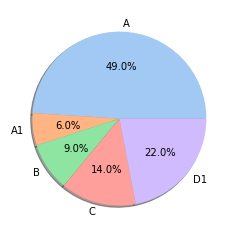

In [67]:
# 
gb = df.groupby(['KT'])['KT'].agg(['count'])


labels = gb.index # labels = ['A','A1','B','C','D1']
data = list(gb['count']) # data= [49,6,9,14,22]

colors = sns.color_palette('pastel') # Tạo bảng màu

plt.pie(data, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True)

plt.show()

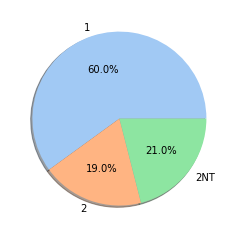

In [68]:
'''
Sinh viên tự viết thống kê tỉ lệ phần trăm cho KV
'''
gb = df.groupby(['KV'])['KV'].agg(['count'])    
labels = gb.index 
data = list(gb['count']) 
colors = sns.color_palette('pastel') # Tạo bảng màu 
plt.pie(data, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True) 
plt.show()



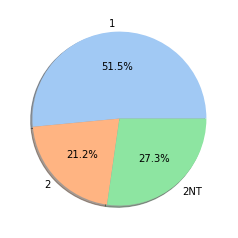

In [69]:
'''
Sinh viên tự viết thống kê tỉ lệ phần trăm cho KV
'''

gb = df.groupby(['KV'])['PLUS'].agg(['sum'])

labels = gb.index
data = list(gb['sum'])

colors = sns.color_palette('pastel') # Tạo bảng màu

plt.pie(data, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True)

plt.show()

In [70]:
# Tổng hớp tring bình diểm M1 theo các kì thi
sns.lineplot(x='NT', y='M1', data=df)
plt.show()

ValueError: Could not interpret input 'NT'

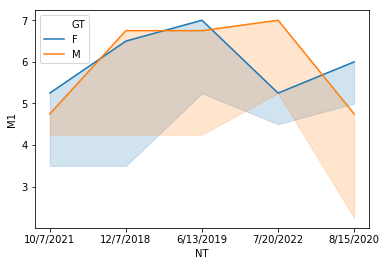

In [24]:
# 
# thời điểm nào là giá trị lớn nhất của M1 của nam nhỏ hơn Nữ


sns.lineplot(x='NT', y='M1', hue='GT', 
             data=df, estimator=np.max)
plt.show()

In [25]:
# Các đại lượng đo lường trung bình, trung vị, min, max, mode, quantile
print(f'{df["M1"].min()}\n{df["M1"].max()}\n')
print(f'{df["M1"].mean()}\n{df["M1"].median()}\n')
print(f'{df["KT"].mode()}\n')
print(f'{df["M1"].quantile(0.25)}\n')
# Hãy cho biết 25 sinh viên có giá trị điểm M1 thấp nhất là phân vị 

1.0
7.0

3.74
3.625

0    A
dtype: object

2.5



In [32]:
# Hãy tính phân vị thứ 9 trong thập phân vị (gọi là p9) cho M1 và M2. Gợi ý: phân vị thứ 9 có tỉ lệ là 0.9
print(f'Phân vị thứ 9 M1: {df["M1"].quantile(0.9)}\n')
print(f'Phân vị thứ 9 M2: {df["M2"].quantile(0.9)}\n')    

Phân vị thứ 9 M1: 5.300000000000004

Phân vị thứ 9 M2: 5.5



In [33]:
df['M1'].max() - df['M1'].min()

6.0

In [29]:
df[['M1','M2']].max() - df[['M1','M2']].min()

M1    6.0
M2    6.5
dtype: float64

In [30]:
df['M1'].quantile(0.75) - df['M1'].quantile(0.25)

2.25

In [32]:
# Hãy tính độ lớn khoảng IQR cho M1 và M2
df['M2'].quantile(0.75) - df['M2'].quantile(0.25)

1.25

In [35]:
# Hãy tính độ lớn khoảng dao động của M2 (gợi ý: |range|)
df['M2'].max()  - df['M2'].min()
# Hãy tính độ lớn của IQR của M2 là bao nhiêu (gợi ý: |IQR|)
# df['M2'].quantile(0.75) - df['M2'].quantile(0.25)
# Hãy tính khoảng giá trị IQR của M2 (gợi ý: [Q1;Q3])
[{df['M2'].quantile(0.75) , df['M2'].quantile(0.25)}]


[{3.5, 4.75}]

In [33]:
#  Hãy tính độ lệch trung bình cho M1 và M2

df['M1'].var()

df['M1'].std()

print(df[['M1','M2']].mean())
print(df[['M1','M2']].std())

df[['M1','M2']].std()/df[['M1','M2']].mean()

df['M1'].describe()

df[['M1','M2','M3']].describe()

cv = df[['M1','M2','M3']].std() / df[['M1','M2','M3']].mean()
list(cv)

M1    3.740
M2    4.255
dtype: float64
M1    1.424408
M2    1.060053
dtype: float64


[0.38085787071882987, 0.2491311130540305, 0.2135664058628459]

['M1', 'M2', 'M3']

In [28]:
# Mô tả biến định lượng 
df['M1'].describe()

count    100.000000
mean       3.740000
std        1.424408
min        1.000000
25%        2.500000
50%        3.625000
75%        4.750000
max        7.000000
Name: M1, dtype: float64

In [29]:
# Tổng hợp thống kê của biến định lượng
df[['M1','M2','M3']].describe()

,M1,M2,M3
count,100.000000,100.000000,100.000000
mean,3.740000,4.255000,4.875000
std,1.424408,1.060053,1.041136
min,1.000000,1.500000,2.750000
25%,2.500000,3.500000,4.250000
50%,3.625000,4.125000,4.750000
75%,4.750000,4.750000,5.500000
max,7.000000,8.000000,8.000000


In [ ]:
# Thống kê dữ liệu của biến M1 của nhóm giới tính 
df.groupby('GT')['M1'].describe()
# Điểm maen cao hơn và std ổn định hơn

,count,mean,std,min,25%,50%,75%,max
GT,,,,,,,,
F,48.0,3.854167,1.348594,1.25,3.1875,3.75,5.0,7.0
M,52.0,3.634615,1.496288,1.00,2.4375,3.50,4.5,7.0


In [33]:
# Tính CV cho M1 theo nhóm giới tính 
df.groupby('GT')['M2'].std()/df.groupby('GT')['M2'].mean()

GT
F    0.252518
M    0.240146
Name: M2, dtype: float64

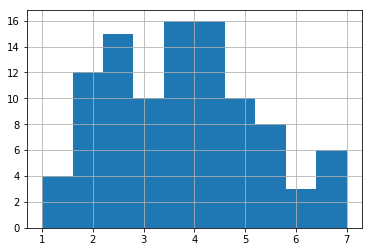

In [ ]:
df['M1'].hist()
plt.show()
# Hãy vẽ biểu đồ hist của M1
# khoảng bằng nhau là bins 
# Tìm giá trị nhỏ nhất của M1 , và khoản dữ liệu nhỏ nhất của M1 
# Xác xuất của cái cái nào cao nhất, và thấp nhất 

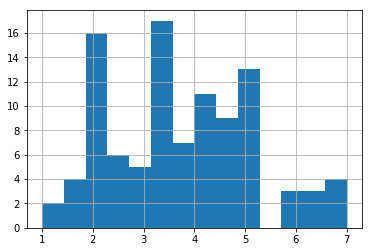

In [36]:
df['M1'].hist(bins=14)
plt.show()

In [75]:
# Làm mịn biểu đồ 

sns.displot(df, x='M1', kind='kdeplot')
plt.show()

AttributeError: module 'seaborn' has no attribute 'displot'

In [76]:
sns.displot(data = df[['M1','M2','M3']], kind='kde')
plt.show()

AttributeError: module 'seaborn' has no attribute 'displot'

In [80]:
# Độ xiên 
# bên trái nhỏ ,bên phải lớn 
# Đại lượng skeness cho biết dộ lệch phan phói của dữ liệu, né skness > 0 (lệch phải ) skeness =  không lệch , skeness < 0 lệch trái 
df['M1'].skew()
# Độ lệch là gái trị tuyệt đối 
df[['M1','M2','M3']].skew()
# Tất cả lệch phải 
# Phân phối chuẩn là không lệch vì thế chọn M1 gần mới phân phối chuẩn nhất

M1    0.333221
M2    0.472551
M3    0.607063
dtype: float64

In [ ]:
# Kuntosis cho biết độ mật, hình dáng của 3 khối
# Nế excesss > 0 -> thin (xác xuất xảy ra ở giữa cao nhất)
# Nế excesss = 0 -> fit (Phân phối xác xuất gần nhất, như phân phối chuẩn)
# Nế excesss < 0 -> fat (Xác xuất thấp sẽ dàng trãi ra trên trục số)

In [82]:
df[['M1','M2','M3']].kurtosis()
# M1 là fat , M2 là thin, M3 thin

M1   -0.517004
M2    1.372439
M3    0.442173
dtype: float64

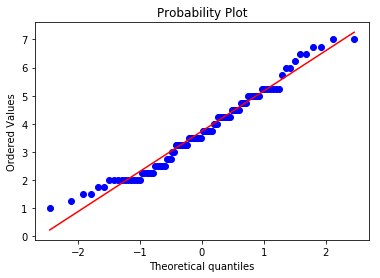

In [83]:
# Kiểm định phân phối chuẩn 
from scipy import stats
stats.probplot(df['M1'],plot=sns.mpl.pyplot)
plt.show()
# Hãy cho biết phân phối M2 có gần phân phối chuẩn hay khong 
# Nếu các đường xanh nằm khít hết đường màu đỏ là phân phối chuẩn, ngược lại 

boxplot

In [ ]:
'''
1: Q1 : tứ phân vị 25% 
2: Q2 : tứ phân vị 50%(median)
3: Q3 : tứ phân vị 75% 
4: đọ lớn IQR = |Q3-Q1|
5: lower bound =Q1 -1.5*IQR(Biên cận dưới)
6: Upper bound =Q1 -1.5*IQR(Biên cận trên )
7: Các ngoại biên, bất thường(outline) cần xử lý nhiều trong dữ liệu 
outline ; là điểm dữ liệu kahcs biết quá so với da số 
không phải có min và max
ngoại biên phải được xử lý 
'''

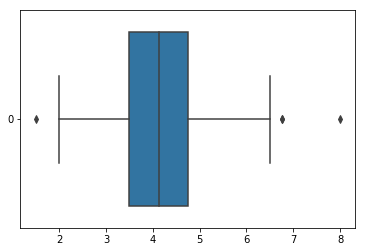

In [86]:
# Hãy vẽ biểu đò boxplot M2
sns.boxplot(data=df['M2'], orient="h")
plt.show()

In [ ]:
# Với điểm M2
# Hãy tính khoảng giá trị nghi ngờ bất thường
# Hãy tính khoảng giá trị được cho là bất thường
# Hãy tính xem có bao nhiêu sinh viên có điểm thi là bất thường

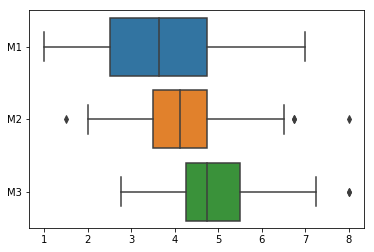

In [87]:

sns.boxplot(data=df[['M1','M2','M3']], orient='h')
plt.show()

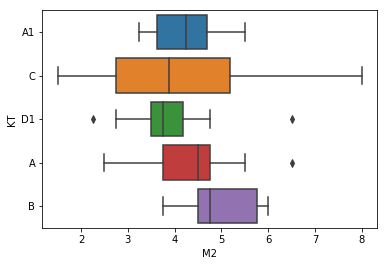

In [88]:
sns.boxplot(x='M2', y='KT',data=df, orient='h')
plt.show()
# Câu hỏi: Khối thi nào có lower bound trùng với tứ phân vị thứ 1 (tức là Q1)
# Các gahp nhau thì dự báo khó 


MultiVariate Anlaysis

In [90]:
'''
Phân tích sự tương quan (tác động, ảnh hưởng) qua lịa giữa các 2 biến động

Phương pháp 1: Hiệp phương sai  : co-variance
Giá trị co-variance > 0 thi 2 biến có tương quan thuận đồng biến(x tăng, y tăng)
co-variance < 0 : tương qua nghịch (x tăng, y giảm)
co-variance = 0 không tương quan (không là gì hết)
'''



'\nPhân tích sự tương quan (tác động, ảnh hưởng) qua lịa giữa các 2 biến động\n\nPhương pháp 1: Hiệp phương sai  : co-variance\nGiá trị co-variance > 0 thi 2 biến có tương quan thuận đồng biến(x tăng, y tăng)\nco-variance < 0 : tương qua nghịch (x tăng, y giảm)\nco-variance = 0 không tương quan (không là gì hết)\n'

In [91]:
# Ma trận hiệp phuong sai, ma trận chéo 
df[['M1','M2']].cov()

,M1,M2
M1,2.028939,0.053081
M2,0.053081,1.123712


In [92]:
df[['M1','M2','M3']].cov()
# Tương quan nghịch M1 , M3

,M1,M2,M3
M1,2.028939,0.053081,0.027778
M2,0.053081,1.123712,-0.101010
M3,0.027778,-0.101010,1.083965


Tương quan tuyến tính(Correlation)

In [ ]:
'''
r nằm trong khoảng [-1,1]
r = 0 -> không tương quan
r < 0 ->  tương quan nghịch
r > 0 ->  tương quan thuận
|r| càng gần 1 thì tương quan cao
|r| < 0.5 thì tương quan thấp
[0.5,0.65] : khá
[0.65,0.75] :tốt
[0.75,0.9] : rất tốt
> 0.9 : hoàn hảo 
'''

d:\USERS\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


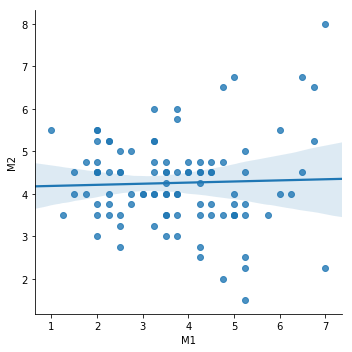

In [93]:
sns.lmplot(data=df, x='M1', y='M2', fit_reg=True)
plt.show()

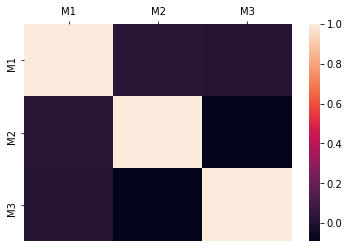

In [94]:
sns.heatmap(df[['M1','M2','M3']].corr(), vmax=1.0, square=False).xaxis.tick_top()

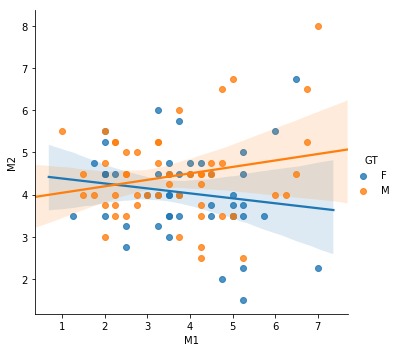

In [95]:

sns.lmplot(data=df, x='M1', y='M2',hue='GT', fit_reg=True)
plt.show()

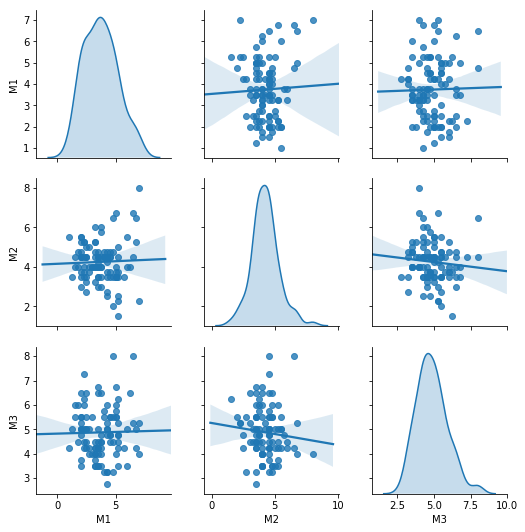

In [96]:
sns.pairplot(df[['M1','M2','M3']],diag_kind='kde', kind='reg')
plt.show()